In [ ]:
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras import datasets,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

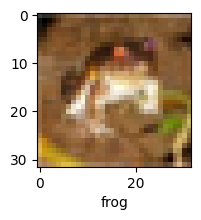

In [ ]:
plot_sample(x_train,y_train,0)

artificial neural network
normalizing into RGB(RGB if from 0-255)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
from tensorflow.keras.layers import Flatten


In [ ]:
# keras.optimizers.Optimizer
# keras.utils.custom_object_scope

In [ ]:
# artifical neural network models
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 393s 251ms/step - loss: 1.8068 - accuracy: 0.3571
Epoch 2/5
1563/1563 [==============================] - 428s 274ms/step - loss: 1.6175 - accuracy: 0.4300
Epoch 3/5
1563/1563 [==============================] - 409s 261ms/step - loss: 1.5375 - accuracy: 0.4611
Epoch 4/5
1563/1563 [==============================] - 362s 232ms/step - loss: 1.4787 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 332s 213ms/step - loss: 1.4254 - accuracy: 0.4999


In [ ]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 14s 42ms/step - loss: 1.4511 - accuracy: 0.4818


[1.4510554075241089, 0.48179998993873596]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element)for element in y_pred]
print("classification report:\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 13s 42ms/step
classification report:
               precision    recall  f1-score   support

           0       0.47      0.65      0.54      1000
           1       0.72      0.41      0.52      1000
           2       0.36      0.39      0.38      1000
           3       0.34      0.33      0.33      1000
           4       0.48      0.35      0.41      1000
           5       0.36      0.43      0.39      1000
           6       0.51      0.59      0.55      1000
           7       0.67      0.41      0.51      1000
           8       0.61      0.61      0.61      1000
           9       0.48      0.65      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



CNN

In [ ]:
cnn=models.Sequential([
    # cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),#relu is less expensive to calculate
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),#layer 2 of the cnn
    layers.MaxPooling2D((2,2)),
    # dense layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
# softmax normalize the probability

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4883 - accuracy: 0.4639
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1358 - accuracy: 0.6013
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0108 - accuracy: 0.6478
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9314 - accuracy: 0.6744
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8628 - accuracy: 0.7015
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8076 - accuracy: 0.7192
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7652 - accuracy: 0.7352
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7198 - accuracy: 0.7483
Epoch 9/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6785 - accuracy: 0.7632
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 12ms/step - loss: 0.9300 - accuracy: 0.6938


[0.9299750924110413, 0.6937999725341797]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)

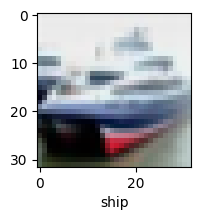

In [ ]:
plot_sample(x_test,y_test,1)

In [ ]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 6s 19ms/step


array([[2.44426501e-05, 5.12568158e-06, 8.85405287e-04, 8.03920090e-01,
        3.51860876e-06, 1.93792135e-01, 8.28302873e-04, 1.92980551e-05,
        5.14729414e-04, 6.85928580e-06],
       [1.22481035e-02, 5.72746284e-02, 1.32550063e-04, 1.23398991e-07,
        7.81886865e-06, 2.72620970e-09, 6.15051432e-09, 2.85608053e-08,
        9.28010523e-01, 2.32615857e-03],
       [8.23428258e-02, 6.77151620e-01, 5.76195831e-04, 1.10736779e-04,
        1.44962585e-04, 2.31625781e-05, 2.80167806e-05, 3.79358862e-05,
        9.52488557e-02, 1.44335717e-01],
       [9.47648048e-01, 1.08395228e-02, 1.23096071e-02, 4.32375167e-03,
        5.33036728e-05, 4.89523063e-06, 5.94188532e-05, 4.42666438e-04,
        2.34458353e-02, 8.72900593e-04],
       [1.41984970e-07, 5.67779398e-06, 6.77764462e-03, 2.44274121e-02,
        7.34742641e-01, 2.15750508e-04, 2.33830079e-01, 2.05938392e-07,
        4.77923720e-07, 4.73077257e-08]], dtype=float32)

In [ ]:
# to find the maximum value we use the argmax
np.argmax([5,12,1,2])
# here in the output it gives 1 because the maximum value is 12 and it will return the index for the maximum value

1

In [ ]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
print("Classification report: \n",classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.78      0.72      1000
           1       0.76      0.85      0.80      1000
           2       0.65      0.55      0.59      1000
           3       0.50      0.53      0.51      1000
           4       0.69      0.61      0.64      1000
           5       0.53      0.68      0.60      1000
           6       0.77      0.77      0.77      1000
           7       0.79      0.74      0.76      1000
           8       0.87      0.73      0.79      1000
           9       0.79      0.73      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
# maxpooling layer reduces the dimension